In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# import fast ai vision library
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = '/kaggle/input/state-farm-distracted-driver-detection/'
img_list = pd.read_csv(path + 'driver_imgs_list.csv')

In [4]:
valid_subjects = img_list.subject.sort_values().unique()[-4:]

In [16]:
img_list['is_valid'] = img_list['subject'].isin(valid_subjects)

In [17]:
print("valid subjects: ", valid_subjects)
print(img_list[img_list['is_valid']==True].subject.count())

valid subjects:  ['p066' 'p072' 'p075' 'p081']
3017


In [18]:
# create new column with class folder and image name combined
img_list['img_path'] = img_list.classname + '/' + img_list.img

In [19]:
valid_names = img_list[img_list['subject'].isin(valid_subjects)].img
valid_names = valid_names.to_list()

In [34]:
img_list.head()

,subject,classname,img,is_valid,img_path
0,p002,c0,img_44733.jpg,False,c0/img_44733.jpg
1,p002,c0,img_72999.jpg,False,c0/img_72999.jpg
2,p002,c0,img_25094.jpg,False,c0/img_25094.jpg
3,p002,c0,img_69092.jpg,False,c0/img_69092.jpg
4,p002,c0,img_92629.jpg,False,c0/img_92629.jpg


In [58]:
# Convert images to 'Float' data type and apply data augmentation transforms
tfms = [ToTensor(), IntToFloatTensor()] + aug_transforms(do_flip=False)

In [61]:

# Create ImageDataLoaders
dls = ImageDataLoaders.from_df(img_list, path=path + 'imgs/train/',
                               fn_col='img_path', valid_col='is_valid',batch_tfms=tfms, get_x=ColReader('classname', pref=path + 'imgs/train/'))


/opt/conda/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


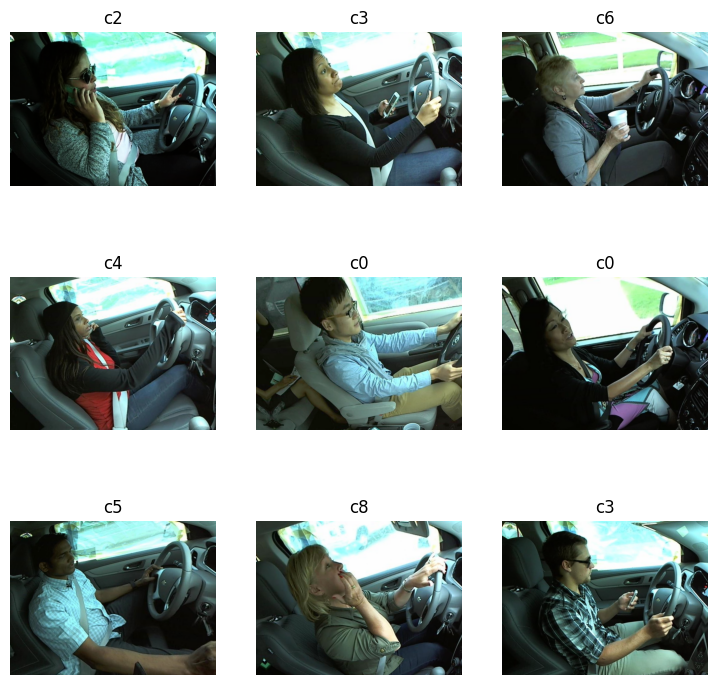

In [62]:
dls.show_batch()

In [63]:
learn = cnn_learner(dls, models.resnet34, metrics=accuracy, model_dir='/')

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 248MB/s] 


In [66]:

learn.fit_one_cycle(6, lr_max=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.250327,1.688375,0.613523,03:41
1,0.210930,2.327623,0.573086,03:36
2,0.135559,1.328286,0.667882,03:36
3,0.056577,0.587843,0.842890,03:37
4,0.033005,0.684863,0.832284,03:36
5,0.018794,0.668146,0.836924,03:37


In [67]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=(1e-4, 1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.163019,1.272977,0.714949,04:52
1,0.127173,0.561278,0.848525,04:51
2,0.065783,1.077902,0.766324,04:51
3,0.043238,0.945951,0.773285,04:49
4,0.015761,0.655755,0.835598,04:49
5,0.006876,0.612332,0.842890,04:49


In [77]:
learn.export('/kaggle/working/cnn_model.pth')

In [78]:
loaded_learn = load_learner('/kaggle/working/cnn_model.pth')

In [ ]:
preds

In [87]:


# Load and preprocess the single image you want to predict
img_path = '/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_1.jpg'  # Replace with the path to your image
img = PILImage.create(img_path)

# Make the prediction
pred, _, prob = loaded_learn.predict(img)




In [88]:
pred

'c5'

<Axes: >

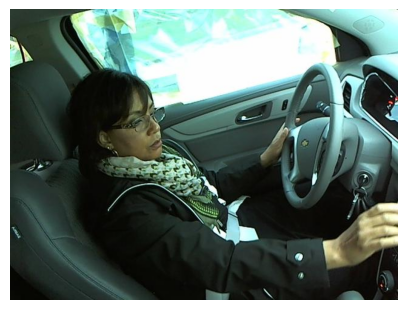

In [89]:
img.show()